In [55]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [56]:
train_df = pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

In [57]:
train_df.isnull().sum()

property_type      0
society            0
sector             0
price              0
Price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
store room         0
study room         0
servant room       0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [58]:
train_df = train_df.drop(columns = ["society", "Price_per_sqft"])

In [59]:
# Luxury score to be converted to categoricla so that the user can give an input 

<Axes: >

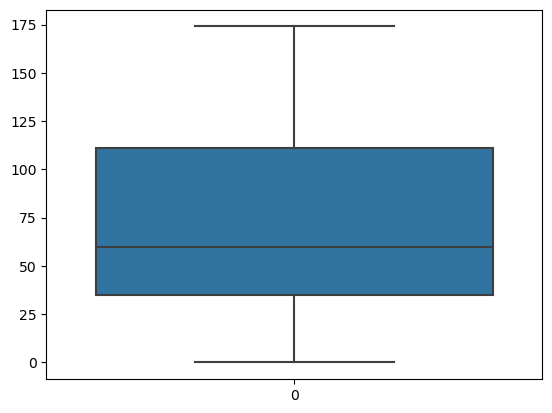

In [60]:
sns.boxplot(train_df["luxury_score"])

In [61]:
def luxury_category(score):
    if 0<=score <50:
        return "low"
    elif 50<=score<150:
        return"medium"
    elif 150<=score <175:
        return "high"
    else:
        return None
        

In [62]:
train_df["luxury_score"] = train_df["luxury_score"].apply(luxury_category)

In [63]:
train_df.head(2)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 70,5.0,6.0,7.0,3+,0.0,Relatively New,5333.0,0,1,1,0,0,0,medium
1,flat,sector 37d,0.6,2.0,2.0,3,7.0,New Property,625.0,0,0,0,0,0,0,low


In [64]:
train_df["luxury_score"].value_counts()

luxury_score
low       1582
medium    1463
high       495
Name: count, dtype: int64

<Axes: >

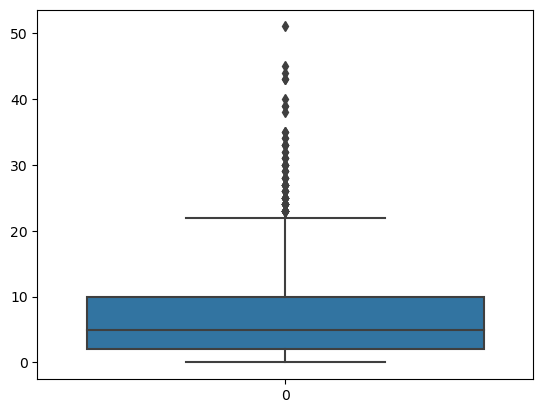

In [65]:
sns.boxplot(train_df["floorNum"])

In [66]:
train_df.isnull().sum()

property_type      0
sector             0
price              0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
store room         0
study room         0
servant room       0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [67]:
def floor_category(floor):
    if 0<=floor<=2:
        return "low floor"
    elif 3<=floor<=10:
        return "med floor"
    elif 11<=floor<=51:
        return "high floor"
    else:
         return None

In [68]:
train_df["floorNum"] = train_df["floorNum"].apply(floor_category) 

In [123]:
train_df.isnull().sum()

property_type      0
sector             0
price              0
bedRoom            0
bathroom           0
balcony            0
floortype          0
agePossession      0
built_up_area      0
store room         0
study room         0
servant room       0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [70]:
train_df.rename(columns = {"floorNum": "floortype"},  inplace=True)

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3540 non-null   object 
 1   sector           3540 non-null   object 
 2   price            3540 non-null   float64
 3   bedRoom          3540 non-null   float64
 4   bathroom         3540 non-null   float64
 5   balcony          3540 non-null   object 
 6   floortype        3540 non-null   object 
 7   agePossession    3540 non-null   object 
 8   built_up_area    3540 non-null   float64
 9   store room       3540 non-null   int64  
 10  study room       3540 non-null   int64  
 11  servant room     3540 non-null   int64  
 12  pooja room       3540 non-null   int64  
 13  others           3540 non-null   int64  
 14  furnishing_type  3540 non-null   int64  
 15  luxury_score     3540 non-null   object 
dtypes: float64(4), int64(6), object(6)
memory usage: 442.6+ KB


In [124]:
train_df.isnull().sum()

property_type      0
sector             0
price              0
bedRoom            0
bathroom           0
balcony            0
floortype          0
agePossession      0
built_up_area      0
store room         0
study room         0
servant room       0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [126]:
train_df.duplicated().sum()

26

In [127]:
train_df.drop_duplicates(inplace=True)

# Export the cleaned dataset to a new CSV file
train_df.to_csv("gurgaon_properties_for_model_selection.csv", index=False)

In [73]:


# List of columns to be converted to float
columns_to_convert = ['store room', 'study room', 'servant room', 'pooja room', 'others', 'furnishing_type']

# Convert the specified columns to float
train_df[columns_to_convert] = train_df[columns_to_convert].astype(float)
train_df.info()
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3540 non-null   object 
 1   sector           3540 non-null   object 
 2   price            3540 non-null   float64
 3   bedRoom          3540 non-null   float64
 4   bathroom         3540 non-null   float64
 5   balcony          3540 non-null   object 
 6   floortype        3540 non-null   object 
 7   agePossession    3540 non-null   object 
 8   built_up_area    3540 non-null   float64
 9   store room       3540 non-null   float64
 10  study room       3540 non-null   float64
 11  servant room     3540 non-null   float64
 12  pooja room       3540 non-null   float64
 13  others           3540 non-null   float64
 14  furnishing_type  3540 non-null   float64
 15  luxury_score     3540 non-null   object 
dtypes: float64(10), object(6)
memory usage: 442.6+ KB


,property_type,sector,price,bedRoom,bathroom,balcony,floortype,agePossession,built_up_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 70,5.00,6.0,7.0,3+,low floor,Relatively New,5333.00,0.0,1.0,1.0,0.0,0.0,0.0,medium
1,flat,sector 37d,0.60,2.0,2.0,3,med floor,New Property,625.00,0.0,0.0,0.0,0.0,0.0,0.0,low
2,flat,sector 79,1.90,3.0,4.0,2,high floor,New Property,2389.00,0.0,0.0,1.0,0.0,0.0,0.0,low
3,flat,sector 59,6.75,4.0,4.0,2,med floor,New Property,2567.00,0.0,0.0,1.0,0.0,0.0,0.0,low
4,flat,sector 49,1.98,3.0,4.0,3,med floor,Moderately Old,1750.75,0.0,0.0,1.0,0.0,0.0,1.0,medium


In [74]:
train_df.shape

(3540, 16)

In [75]:
from sklearn.preprocessing import OrdinalEncoder

In [76]:
data_label_encoded = train_df.copy()

In [77]:
categorical_cat = train_df.select_dtypes(include =["object"]).columns

In [78]:
categorical_cat

Index(['property_type', 'sector', 'balcony', 'floortype', 'agePossession',
       'luxury_score'],
      dtype='object')

In [79]:
for col in categorical_cat:
    oe=OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)
    


[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17b', 'sector 2', 'sector 21', 'sector 22', 'sector 23',
       'sector 24', 'sector 25', 'sector 26', 'sector 27', 'sector 28',
       'sector 3', 'sector 3 phase 2', 'sector 3 phase 3 extension',
       'sector 30', 'sector 31', 'sector 33', 'sector 36', 'sector 36a',
       'sector 37', 'sector 37c', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',


In [80]:
x_label = data_label_encoded.drop( "price", axis =1 )
y_label = data_label_encoded["price"]

In [81]:
x_label

,property_type,sector,bedRoom,bathroom,balcony,floortype,agePossession,built_up_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,0.0,81.0,6.0,7.0,4.0,1.0,3.0,5333.00,0.0,1.0,1.0,0.0,0.0,0.0,2.0
1,0.0,45.0,2.0,2.0,3.0,2.0,1.0,625.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,90.0,3.0,4.0,2.0,0.0,1.0,2389.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,67.0,4.0,4.0,2.0,2.0,1.0,2567.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,56.0,3.0,4.0,3.0,2.0,0.0,1750.75,0.0,0.0,1.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,1.0,63.0,4.0,4.0,4.0,1.0,2.0,1449.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3536,0.0,88.0,3.0,4.0,4.0,2.0,3.0,1833.00,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3537,0.0,42.0,1.0,1.0,1.0,2.0,3.0,436.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3538,0.0,104.0,3.0,3.0,2.0,0.0,3.0,1578.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [82]:
y_label

0       5.00
1       0.60
2       1.90
3       6.75
4       1.98
        ... 
3535    3.55
3536    1.09
3537    0.40
3538    1.23
3539    2.85
Name: price, Length: 3540, dtype: float64

In [83]:
# APPLYING FEATURE SELECTION TECHNIQUES 

In [84]:
#FILTER TECHNIQUES 

In [85]:
#1. CORRELATION ANALYSIS 

<Axes: >

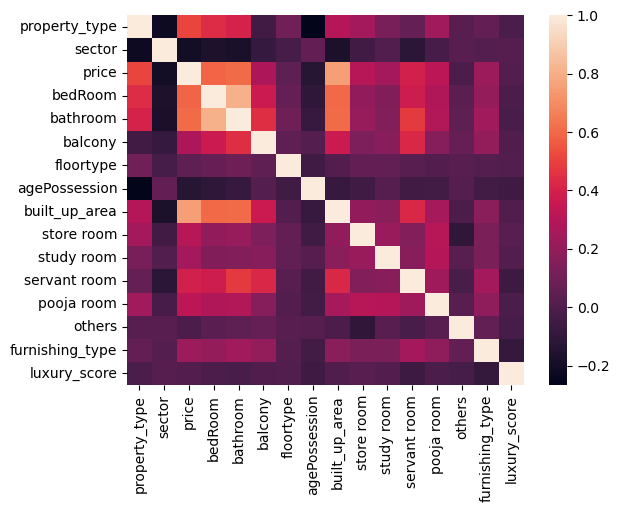

In [86]:
sns.heatmap(data_label_encoded.corr())

In [87]:
data_label_encoded.corr()["price"]

property_type      0.506900
sector            -0.202237
price              1.000000
bedRoom            0.589149
bathroom           0.608155
balcony            0.274306
floortype          0.042730
agePossession     -0.133590
built_up_area      0.747897
store room         0.306939
study room         0.244608
servant room       0.394209
pooja room         0.322409
others            -0.012803
furnishing_type    0.226353
luxury_score       0.010063
Name: price, dtype: float64

In [88]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'features','price':'corr_coeff'})
fi_df1

,features,corr_coeff
0,sector,-0.202237
1,price,1.000000
2,bedRoom,0.589149
3,bathroom,0.608155
4,balcony,0.274306
5,floortype,0.042730
6,agePossession,-0.133590
7,built_up_area,0.747897
8,store room,0.306939
9,study room,0.244608


In [89]:
#2. random forest feature importance - embedded method 

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rf = RandomForestRegressor(n_estimators= 100, random_state=42 )
rf.fit(x_label, y_label)

RandomForestRegressor(random_state=42)

In [92]:
fi_df2 = pd.DataFrame({ "features": x_label.columns, "feature-imp": rf.feature_importances_})

In [93]:
fi_df2.sort_values( by ="feature-imp", ascending=False)

,features,feature-imp
7,built_up_area,0.651634
0,property_type,0.103048
1,sector,0.096320
2,bedRoom,0.029166
3,bathroom,0.025444
10,servant room,0.018537
6,agePossession,0.013337
4,balcony,0.012981
13,furnishing_type,0.009165
9,study room,0.008482


In [94]:
# 3. embedded technique 
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor


gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(x_label, y_label)


fi_df3 = pd.DataFrame({
    "features": x_label.columns,
    "gb_imp": gb.feature_importances_
})

# Sort the DataFrame by feature importance
fi_df3 = fi_df3.sort_values(by="gb_imp", ascending=False)

# Display the DataFrame
fi_df3


,features,gb_imp
7,built_up_area,0.676269
1,sector,0.103639
0,property_type,0.097836
3,bathroom,0.037684
2,bedRoom,0.034210
10,servant room,0.027679
8,store room,0.008864
6,agePossession,0.005152
13,furnishing_type,0.002826
4,balcony,0.001912


In [95]:
#4 permutation importance 

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators= 100, random_state=42)
model.fit(X_train, y_train)

# Perform permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for permutation importances
fi_df4 = pd.DataFrame({
    'features': x_label.columns,
    'importance_mean': result.importances_mean,
    
})

# Sort the DataFrame by importance mean
fi_df4 = fi_df4.sort_values(by='importance_mean', ascending=False)

# Display the DataFrame

fi_df4

,features,importance_mean
7,built_up_area,0.664554
0,property_type,0.180211
1,sector,0.127057
10,servant room,0.009844
3,bathroom,0.004362
2,bedRoom,0.002000
4,balcony,0.001681
8,store room,0.000205
6,agePossession,0.000015
14,luxury_score,-0.000667


In [97]:
# 5 lasso 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Assuming x_label and y_label are your feature and target DataFrames/Series respectively

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_label)

# Apply Lasso regression
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_scaled, y_label)

# Create DataFrame for Lasso coefficients
fi_df5 = pd.DataFrame({
    "features": x_label.columns,
    "lasso_imp": lasso.coef_
})

# Sort the DataFrame by feature importance
fi_df5 = fi_df5.sort_values(by="lasso_imp", ascending=False)

# Display the DataFrame
fi_df5

,features,lasso_imp
7,built_up_area,1.484792
0,property_type,0.683741
3,bathroom,0.273546
8,store room,0.161077
9,study room,0.118148
10,servant room,0.110743
13,furnishing_type,0.096586
11,pooja room,0.046798
1,sector,-0.000000
2,bedRoom,0.000000


In [98]:

# 6. RFE
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)
selector_label = selector_label.fit(x_label, y_label)

# Get the selected features based on RFE
selected_features = x_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'features': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,features,rfe_score
7,built_up_area,0.650065
0,property_type,0.102825
1,sector,0.100976
3,bathroom,0.027997
2,bedRoom,0.024568
10,servant room,0.020033
6,agePossession,0.014849
4,balcony,0.012280
13,furnishing_type,0.010921
8,store room,0.008078


In [99]:
# 7.linear reg 
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'features': x_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,features,reg_coeffs
7,built_up_area,1.508722
0,property_type,0.721968
3,bathroom,0.279150
8,store room,0.202468
9,study room,0.179469
13,furnishing_type,0.173640
10,servant room,0.170993
11,pooja room,0.077064
14,luxury_score,0.068037
2,bedRoom,0.012227


In [100]:
final_fi_df = fi_df1.merge(fi_df2,on='features').merge(fi_df3,on='features').merge(fi_df4,on='features').merge(fi_df5,on='features').merge(fi_df6,on='features').merge(fi_df7,on='features').set_index('features')

In [101]:
final_fi_df

,corr_coeff,feature-imp,gb_imp,importance_mean,lasso_imp,rfe_score,reg_coeffs
features,,,,,,,
sector,-0.202237,0.096320,0.103639,0.127057,-0.000000,0.100976,-0.066317
bedRoom,0.589149,0.029166,0.034210,0.002000,0.000000,0.024568,0.012227
bathroom,0.608155,0.025444,0.037684,0.004362,0.273546,0.027997,0.279150
balcony,0.274306,0.012981,0.001912,0.001681,0.000000,0.012280,-0.061860
floortype,0.042730,0.005577,0.000642,-0.000981,-0.000000,0.005712,-0.012834
agePossession,-0.133590,0.013337,0.005152,0.000015,-0.000000,0.014849,0.004182
built_up_area,0.747897,0.651634,0.676269,0.664554,1.484792,0.650065,1.508722
store room,0.306939,0.008429,0.008864,0.000205,0.161077,0.008078,0.202468
study room,0.244608,0.008482,0.001579,-0.002866,0.118148,0.006178,0.179469


In [102]:

mean_scores = final_fi_df[[ 'feature-imp', 'gb_imp', 'importance_mean', 'rfe_score']].abs().mean(axis=1)

# Sort the values in descending order
mean_scores_sorted = mean_scores.sort_values(ascending=False)

mean_scores_sorted

features
built_up_area      0.660630
sector             0.106998
bathroom           0.023872
bedRoom            0.022486
servant room       0.019023
furnishing_type    0.008566
agePossession      0.008338
balcony            0.007214
store room         0.006394
study room         0.004776
luxury_score       0.004186
pooja room         0.004091
floortype          0.003228
others             0.002077
dtype: float64

In [103]:
# AFTER PERFORMING THE FEATURE SELECTION HAVE DECIDED TO REMOVE POOJA ROOM AND OTHERS 


In [104]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label, y_label, cv=5, scoring='r2')

In [105]:
scores.mean()

0.7921272060803463

In [106]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [107]:
scores.mean()

0.7939813301834404

In [108]:
# AS there are no significant changes i have decided to drop these columns 

In [109]:
export_df = x_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [110]:
export_df.to_csv('gurgaon_properties_post_feature_selection_with_ordinal_encoding.csv', index=False)

In [113]:
export_df.head(5)

,property_type,sector,bedRoom,bathroom,balcony,floortype,agePossession,built_up_area,store room,servant room,furnishing_type,luxury_score,price
0,0.0,81.0,6.0,7.0,4.0,1.0,3.0,5333.00,0.0,1.0,0.0,2.0,5.00
1,0.0,45.0,2.0,2.0,3.0,2.0,1.0,625.00,0.0,0.0,0.0,1.0,0.60
2,0.0,90.0,3.0,4.0,2.0,0.0,1.0,2389.00,0.0,1.0,0.0,1.0,1.90
3,0.0,67.0,4.0,4.0,2.0,2.0,1.0,2567.00,0.0,1.0,0.0,1.0,6.75
4,0.0,56.0,3.0,4.0,3.0,2.0,0.0,1750.75,0.0,1.0,1.0,2.0,1.98


In [ ]:
n = int(input('give your num'))
sum = 0
l=1
while l<=n:
   a =  l/(for i in range (1,n+1):
           print 
          )
    sum =sum+a


In [3]:
n = int(input('give your num'))
sum = 0
l=1
for i in range(1, n+1):
    l=l*i
    a=i/l
    
    sum=sum+a
sum
    

give your num5


2.708333333333333

In [4]:
3 in [2,3,4,5]

True

In [9]:
for i in range(1,5):
    for j in range(1,5):
        print(i,j)

1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4
3 1
3 2
3 3
3 4
4 1
4 2
4 3
4 4


In [18]:
3*"*"

'***'

In [4]:
n = int(input('give your num'))
i =1
while i<=n:
    print(i*'*')
    i=i+1

give your num6
*
**
***
****
*****
******


In [1]:
n = int(input('give your num'))
i=1
while i<=n:
    for j in range(1,i+1):
        print(j,end = "")
    for k in range(i-1,0,-1):
        print(k, end="")
    print()
    
    i=i+1

give your num5
1
121
12321
1234321
123454321


In [4]:
for i in range(1,10):
    if i==6:
        break
    print(i)

1
2
3
4
5


In [10]:
a = int(input('give 1'))
b = int(input('give 2'))

l =[]
for i in range(a,b+1):
    for j in range(2,i):
        if i%j==0:
            break
    else:
        l.append(i)
l
            


give 11
give 210


[1, 2, 3, 5, 7]

SyntaxError: unexpected character after line continuation character (47942863.py, line 1)

In [ ]:
for i in range(1,10):
    print()